# NAME: JATIN RASTOGI

## THE SPARKS FOUNDATION GRIPMarch21

### Data Science And Business Analytics Intern at The Sparks Foundation

 ### Task 1: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [188]:
  # First let us import the modules used for the algorithm.

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [190]:
data = pd.read_csv("Iris.csv")
data.head(100)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor


### Now we add features to this data frame.

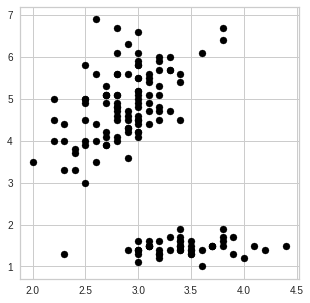

In [191]:
X = data[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm","Species"]]
plt.scatter(X["SepalWidthCm"],X["PetalLengthCm"],c="black")


plt.show()

### As we can see the give feature "Species" is not a float So we have to convert it in a numerical form so it can be used in K-means algorithm.

In [192]:
from sklearn.preprocessing import OneHotEncoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_cols = pd.DataFrame(OH_encoder.fit_transform(X[["Species"]]))
X_cols.index = X.index
num_X = X.drop(["Species"],axis=1)
X_encoded = pd.concat([num_X,X_cols],axis=1)
X_encoded.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,0,1,2
0,5.1,3.5,1.4,0.2,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,1.0,0.0,0.0


### After Viewing the plot, now we have to determine the optimum number of clusters for our data set.

### Although features used here are only 4,but just for confirmation we should use the famous "Elbow Method" for finding the optimum number of clusters.First let us import the modules.

In [193]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

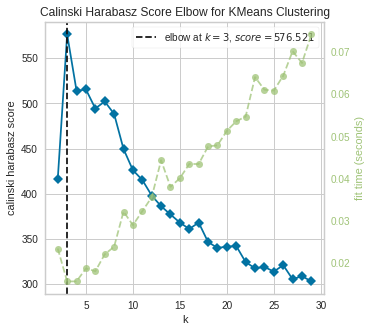

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [194]:
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='calinski_harabasz', timings= True)
visualizer.fit(X_encoded)        # Fit the data to the visualizer
visualizer.show()     

### As we can see in this graph clearly,it states that the elbow of the graph is found at k=3 and hence we infer that the value of k =3


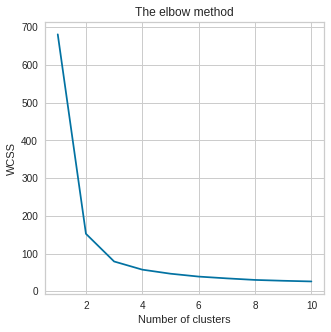

In [195]:
wcss = []
x = X_encoded.iloc[:,0:4].values
#print(x)
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init="k-means++",
                    max_iter=100,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

### You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.From this we choose the number of clusters as "3".

In [196]:
kmeans = KMeans(n_clusters=3,init="k-means++",max_iter=100,
                n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(X_encoded)


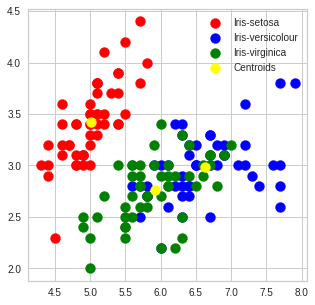

In [197]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()